In [1]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, model_from_json
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import os
from Preprocessing.preprocessing import otsu_threshold, crop_on_borders

### **1 - Loading, preprocessing and spliting the data:**

In [2]:
classes = {}
label_vectors = np.eye(29).astype(int)
my_path = "Data/alphabet"
data , labels = [],[]
i = 0

In [ ]:
chars_set = {}
for folder in os.listdir(my_path):
        print("Now on : ",folder)
        classes[folder] = label_vectors[i]
        chars_set[i] = folder
        i = i+1
        f = my_path+"/"+folder
        for image in os.listdir(f):
            img = Image.open(f+"/"+image)
            crop_pars = crop_on_borders(img)
            cropped = np.array(img.crop(crop_pars).resize((60,60)).convert("L"))
            data.append(cropped)
            labels.append(classes[folder])

Now on :  أ


c:\Users\s_bou\Downloads\DL_OCR_Project\Preprocessing\preprocessing.py:23: RuntimeWarning: invalid value encountered in scalar divide
  u0 = np.sum(np.arange(i) * hist[:i]) / (w0 * total_pixels)


Now on :  ب
Now on :  ت
Now on :  ث
Now on :  ج
Now on :  ح
Now on :  خ
Now on :  د
Now on :  ذ
Now on :  ر
Now on :  ز
Now on :  س
Now on :  ش
Now on :  ص
Now on :  صلى
Now on :  ض
Now on :  ط
Now on :  ظ
Now on :  ع
Now on :  غ
Now on :  ف
Now on :  ق
Now on :  ك
Now on :  ل
Now on :  م
Now on :  ن
Now on :  ه
Now on :  و
Now on :  ي


In [4]:
X_train ,X_test,y_train ,y_test = train_test_split(data,labels,test_size=0.25,random_state=42)

### **2 - Preparing the data for training :**

In [5]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### **3 - Building the CNN model:**

In [6]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(60, 60, 1)))
model.add(BatchNormalization())  # Normalize feature maps
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Regularization

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(29, activation='softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary
model.summary()

c:\Users\s_bou\Downloads\DL_OCR_Project\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513,949 (1.96 MB)

 Trainable params: 513,245 (1.96 MB)

 Non-trainable params: 704 (2.75 KB)

### **4 - Training the model:**

In [7]:
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=20, 
    validation_data=(X_test, y_test)  
)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.0690 - loss: 4.4741 - val_accuracy: 0.3538 - val_loss: 2.9226
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.2467 - loss: 2.8732 - val_accuracy: 0.3538 - val_loss: 2.4205
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3495 - loss: 2.2583 - val_accuracy: 0.5094 - val_loss: 1.5140
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.4430 - loss: 1.9679 - val_accuracy: 0.7311 - val_loss: 0.9710
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5468 - loss: 1.6208 - val_accuracy: 0.8019 - val_loss: 0.7623
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.5494 - loss: 1.5217 - val_accuracy: 0.8208 - val_loss: 0.7393
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6114 - loss: 1.3451 - val_accuracy: 0.8915 - val_loss: 0.6098
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6642 - loss: 1.1884 - val_accuracy: 

### **5-  Evaluating the model:**

In [8]:
result = model.evaluate(X_test, y_test)
print(f"Accuracy : {result[1]:.4f}")
print(f"Accuracy : {result[0]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9615 - loss: 0.2306
Accuracy : 0.9670
Accuracy : 0.2927


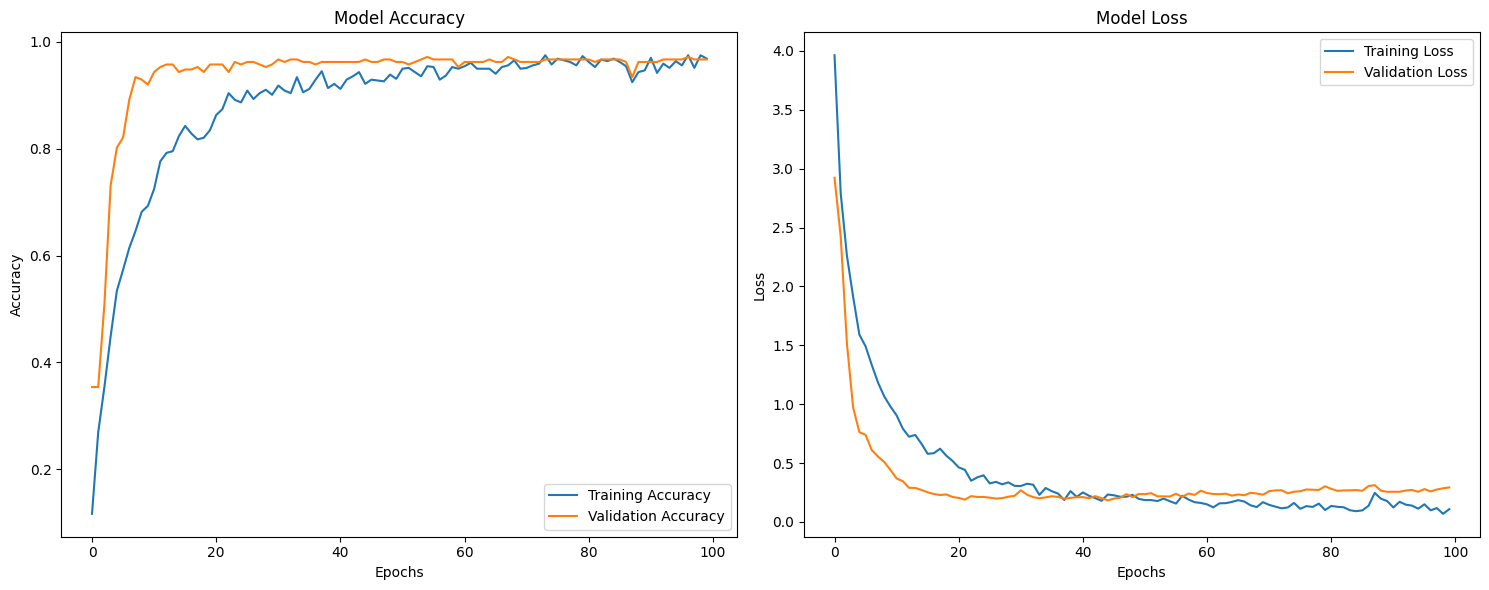

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

### **6 - Testing Our model :**

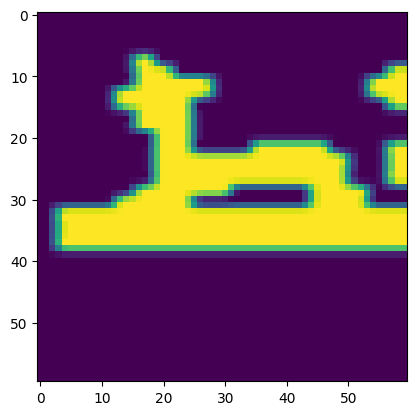

In [10]:
plt.imshow(X_test[0])

In [11]:
temp = np.array([X_test[0]])
res = model.predict(temp)
chars_set[np.argmax(res)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


'ط'

### **7 - Saving our model :**

In [12]:
model.save("model.h5")  # Save the model to an HDF5 file

In [13]:
import pickle

with open("chars.pkl", "wb") as file:
    pickle.dump(chars_set, file)

print("Dictionary saved.")

Dictionary saved.
